[[ 6.75557531e+00+0.00000000e+00j  4.29248590e-01+8.53902780e-18j
   4.30934588e-02+2.26828512e-17j ...  8.32458242e-03-2.10103601e-17j
   4.30934588e-02-2.31636931e-17j  4.29248590e-01-9.61333474e-18j]
 [ 4.10636817e-01+1.50342701e-17j  5.51093622e-02+2.21031286e-17j
   1.97211565e-02-3.83018537e-18j ...  7.04695689e-02-1.51435815e-17j
   6.96344259e-02-5.20145159e-18j  1.25538798e-01+4.80160013e-18j]
 [ 8.47687517e-02-5.97240511e-17j  2.53372334e-02-1.25667745e-17j
   3.29209298e-02+2.19659305e-18j ...  4.09357046e-03+1.25895815e-17j
   3.26629358e-02-1.39704380e-18j -1.65138501e-03-1.82869521e-17j]
 ...
 [ 7.13401151e-02-5.45655368e-17j  1.67627034e-02-8.48770443e-18j
  -4.84298146e-04-1.93902515e-17j ...  1.06831634e-02-1.52070392e-17j
  -3.14069832e-03-2.66902086e-17j  1.30493338e-02-1.53226370e-17j]
 [ 8.47687517e-02+6.00060309e-17j -1.65138501e-03+1.43788946e-17j
   3.26629358e-02+5.76819637e-19j ...  1.13141235e-02+1.72682933e-17j
   3.29209298e-02-2.88584392e-18j  2.53372334e-

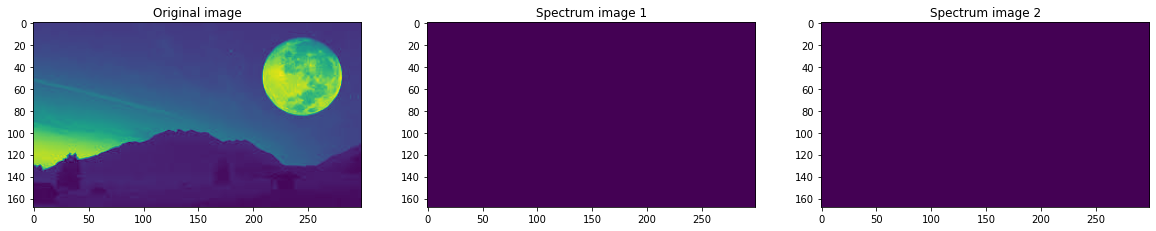

In [9]:
from fft import *
import cv2
import matplotlib.pyplot as plt

img_path = "/mnt/disk1/doan/phucnp/Graduation_Thesis/my_thesis/forensics/fourier_transform/test.jpg"
# mode2(img_path)
img = cv2.imread(img_path, flags=0)

fft = np.fft.fft2(img)
fftshift = np.fft.fftshift(fft)
mag = np.log(np.abs(fftshift))

iffmag = np.fft.ifft2(np.fft.ifftshift(mag))
print(iffmag)
iffmag_abs = np.abs(iffmag)
iffmag_abs = iffmag_abs / np.max(iffmag_abs) * 255
iffmag_abs = iffmag_abs.astype(np.int32)

iffmag_real = np.real(iffmag)
iffmag_real = iffmag_real / np.max(iffmag_real) * 255
iffmag_real = iffmag_real.astype(np.int32)
print(iffmag_abs)
print(iffmag_real)

# ifft = np.real(np.fft.ifft2(mag))
# print(ifft)
# print(img)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original image")
plt.subplot(1, 3, 2)
plt.imshow(iffmag_real)
plt.title('Spectrum image 1')
plt.subplot(1, 3, 3)
plt.imshow(iffmag_abs)
plt.title('Spectrum image 2')
plt.show()

# dft_shift = np.fft.fftshift(dft)

# # Cộng với 1 lượng epsilon để có thể tính log:
# dft_shift += 1e-5

# # dft_shift vẫn đang là complex => Ta tìm biên độ của phổ của ảnh:
# magnitude_spectrum_1 = cv2.magnitude(dft_shift[:,:,0], dft_shift[:, :, 1])
# magnitude_spectrum_2 = 2000 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:, :, 1]))

In [33]:
import sys
sys.path.append("/mnt/disk1/phucnp/Graduation_Thesis/review/forensics/dl_technique")
from model.vision_transformer.dual_efficient_vit import DualEfficientViT
from dataloader.gen_dataloader import generate_test_dataloader_dual_stream
import torch
import torch.nn.functional as F
from torchvision import transforms

device = torch.device('cpu')
test_dir = "/mnt/disk1/phucnp/Dataset/dfdc/image/test"
test_loader = generate_test_dataloader_dual_stream(test_dir, 128, 32, 4)
it = iter(test_loader)
inputs, ffts, labels = it.next()
inputs, ffts, labels = inputs.float().to(device), ffts.float().to(device), labels.float().to(device)

model = DualEfficientViT(image_size=128, heads=3, depth=4, patch_size=2, freeze=0, version="cross_attention-freq-add", weight=0.8)

model = model.to(device)
model.load_state_dict(torch.load("/mnt/disk1/phucnp/Graduation_Thesis/review/forensics/dl_technique/checkpoint/dfdc/dual_efficient_vit/v_cross_attention-freq-add_w_0.8_lr_0.0003_patch_2_h_3_d_4_es_none_loss_bce_freeze_0/step/best_test_acc_0.726794.pt", map_location=device))

model.eval()
out_spa = model.spatial_extractor.extract_features(inputs)
out_fft = model.freq_extractor.extract_features(ffts)
ifreq_features =  F.normalize(torch.log(torch.abs(torch.fft.ifft2(torch.fft.ifftshift(out_fft)) + 1e-5)))
print("out spatial", out_spa)
# print("out fft", out_fft)
print("ifreq", ifreq_features)

Test (dual) dataset:  80441
Test dataset:  80441
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
out spatial tensor([[[[-1.2039e-01, -1.7117e-01, -2.0935e-01, -1.4373e-01],
          [-2.5770e-01,  5.9363e-01,  4.2503e-01, -2.7845e-01],
          [-2.6346e-01, -1.6691e-01, -2.1873e-01, -2.3634e-01],
          [-1.3788e-01, -2.5663e-01, -2.4550e-01, -1.0909e-01]],

         [[-6.8217e-02, -1.2960e-01, -1.5599e-01, -9.0285e-02],
          [-5.1202e-02,  4.3375e+00,  3.0253e+00, -2.6970e-01],
          [-1.7511e-01, -2.6197e-01, -2.7844e-01, -1.5731e-01],
          [-7.2113e-02, -2.1681e-01, -2.1030e-01, -7.6695e-02]],

         [[-1.5435e-01, -2.3256e-01, -2.5152e-01, -1.6059e-01],
          [-2.7683e-01, -3.2005e-02, -8.6295e-02, -2.7277e-01],
          [-2.3470e-01,  1.2430e+00,  5.3374e-01, -2.6758e-01],
          [-1.4604e-01, -2.5635e-01, -2.3121e-01, -1.0346e-01]],

         ...,

         [[-2.5036e-01, -2.3878e-01, -2.2643e-01, -2.4513e

In [38]:
import torch.nn as nn
from torch import einsum
import torch
from torchsummary import summary
from einops import rearrange

import sys
from model.backbone.efficient_net.model import EfficientNet

import re
import torch.nn.functional as F

import re, math
from model.vision_transformer.vit import Transformer


class DualEfficientViT(nn.Module):
    def __init__(self, channels=1280,\
                 image_size=224,patch_size=7,num_classes=1,dim=1024,\
                 depth=6,heads=8,mlp_dim=2048,\
                 emb_dim=32, dim_head=64,dropout=0.15,emb_dropout=0.15,version="cross_attention-spatial-cat",weight=0.5,freeze=0, pool='cls'):  
        super(DualEfficientViT, self).__init__()

        self.image_size = image_size
        self.patch_size = patch_size
        self.num_classes = num_classes
        self.dim = dim
        self.depth = depth
        self.heads = heads
        self.mlp_dim = mlp_dim
        self.emb_dim = emb_dim
        self.dim_head = dim_head
        self.dropout_value = dropout
        self.emb_dropout = emb_dropout
        self.pool = pool
        
        self.features_size = {
            128: (4, 4),
            224: (7, 7),
            256: (8, 8)
        }
        
        # "cross_attention-spatial-cat": sử dụng cross-attention, cat với spatial vectors output
        # "cross_attention-spatial-add": sử dụng cross-attention, add với spatial vectors output
        # "cross_attention-freq-cat": sử dụng cross-attention, cat với freq vectors
        # "cross_attention-freq-add": sử dụng cross-attention, add với freq vectors
        # "merge-add": cộng thẳng 2 vectors spatial và freq, có weight: spatial + weight*freq
        # "merge-cat": cat thẳng 2 vectors spatial và freq, có weight: spatial + weight*freq
        self.version = version
        self.weight = weight

        self.spatial_extractor = self.get_feature_extractor(freeze=freeze, num_classes=num_classes, in_channels=3)   # efficient_net-b0, return shape (1280, 8, 8) or (1280, 7, 7)
        self.freq_extractor = self.get_feature_extractor(freeze=freeze, num_classes=num_classes, in_channels=1)

        ############################# Xét 2 stream hiện tại là như nhau
        # Kích thước của 1 patch
        self.patch_size = patch_size
    
        # Số lượng patches
        self.num_patches = int((self.features_size[image_size][0] * self.features_size[image_size][1]) / (self.patch_size * self.patch_size))
        # Patch_dim = P^2 * C
        self.patch_dim = channels * (self.patch_size ** 2)

        # print("Num patches: ", self.num_patches)
        # print("Patch dim: ", self.patch_dim)

        # Embed vị trí cho từng patch
        self.pos_embedding = nn.Parameter(torch.randn(1, self.num_patches+1, self.dim))
        # self.pos_embedding_1 = nn.Parameter(torch.randn(1, self.num_patches, self.dim))
        # self.pos_embedding_2 = nn.Parameter(torch.randn(1, self.num_patches, self.dim))
        # self.pos_embedding_3 = nn.Parameter(torch.randn(1, self.num_patches, self.dim))

        # Đưa flatten vector của feature maps về chiều cố định của vector trong transformer.
        # self.patch_to_embedding_1 = nn.Linear(self.patch_dim, self.dim)
        # self.patch_to_embedding_2 = nn.Linear(self.patch_dim, self.dim)

        # Giảm chiều vector sau concat 2*patch_dim về D:
        self.patch_to_embedding_cat = nn.Linear(2*self.patch_dim, self.dim)
        self.patch_to_embedding_add = nn.Linear(self.patch_dim, self.dim)

        # Thêm 1 embedding vector cho classify token:
        self.cls_token = nn.Parameter(torch.randn(1, 1, self.dim))

        self.dropout = nn.Dropout(self.emb_dropout)
        self.transformer = Transformer(self.dim, self.depth, self.heads, self.dim_head, self.mlp_dim, self.dropout_value)

        self.to_cls_token = nn.Identity()

        self.mlp_head = nn.Sequential(
            nn.Linear(self.dim, self.mlp_dim),
            nn.ReLU(),
            nn.Linear(self.mlp_dim, self.num_classes)
        )
        self.sigmoid = nn.Sigmoid()

    def get_feature_extractor(self, architecture="efficient_net", freeze=0, pretrained="", num_classes=1, in_channels=3):
        extractor = None
        if architecture == "efficient_net":
            if pretrained == "":
                extractor = EfficientNet.from_pretrained('efficientnet-b0', num_classes=num_classes,in_channels = in_channels)
            else:
                extractor = EfficientNet.from_pretrained('efficientnet-b7', num_classes=num_classes,in_channels = in_channels)
                # Load checkpoint
                checkpoint = torch.load(pretrained, map_location="cpu")
                state_dict = checkpoint.get("state_dict", checkpoint)
                # Load weights
                extractor.load_state_dict({re.sub("^module.", "", k): v for k, v in state_dict.items()}, strict=False)

            if freeze:
            # Freeze the first (num_blocks - 3) blocks and unfreeze the rest 
                for i in range(0, len(extractor._blocks)):
                    for index, param in enumerate(extractor._blocks[i].parameters()):
                        if i >= len(extractor._blocks) - 3:
                            param.requires_grad = True
                        else:
                            param.requires_grad = False
        elif architecture == "xception_net":
            pass
        return extractor

    """
        Get from torch.nn.MultiheadAttention
        scale-dot: https://github.com/pytorch/pytorch/blob/1c5a8125798392f8d7c57e88735f43a14ae0beca/torch/nn/functional.py#L4966
        multi-head: https://github.com/pytorch/pytorch/blob/1c5a8125798392f8d7c57e88735f43a14ae0beca/torch/nn/functional.py#L5059
    """
    def scale_dot(self, q, k, v, attn_mask=None, dropout_p=0):
        B, Nt, E = q.shape
        q = q / math.sqrt(E)
        # (B, Nt, E) x (B, E, Ns) -> (B, Nt, Ns)
        attn = torch.bmm(q, k.transpose(-2, -1))
        if attn_mask is not None:
            attn += attn_mask
        attn = torch.nn.functional.softmax(attn, dim=-1)
        if dropout_p > 0.0:
            attn = torch.nn.functional.dropout(attn, p=dropout_p)
        # (B, Nt, Ns) x (B, Ns, E) -> (B, Nt, E)
        output = torch.bmm(attn, v)
        return output, attn

    def cross_attention(self, spatials, ifreqs):
        """
            spatials: (B, N, D) --> Query,
            freqs: (B, N, D) --> Key
            output: 
        """
        emb_dim = spatials.shape[2]
        assert emb_dim == ifreqs.shape[2]
        attn_outputs, attn_weights = self.scale_dot(spatials, ifreqs, ifreqs)
        return attn_outputs, attn_weights


    def forward(self, spatial_imgs, frequency_imgs):
        p = self.patch_size
        # Extract features
        spatial_features = self.spatial_extractor.extract_features(spatial_imgs)                 # shape (batchsize, 1280, 8, 8)
        freq_features = self.freq_extractor.extract_features(frequency_imgs)                     # shape (batchsize, 1280, 8, 8)conda
        ifreq_features = torch.log(torch.abs(torch.fft.ifft2(torch.fft.ifftshift(freq_features))) + 1e-10)  # Hơi ảo???
        # print(ifreq_features.shape)
        # assert(ifreq_features.shape == freq_features.shape)
        # print("Features shape: ", spatial_features.shape, freq_features.shape)

        # Flatten to vector:
        spatial_vectors = rearrange(spatial_features, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=p, p2=p)
        freq_vectors = rearrange(freq_features, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=p, p2=p)
        ifreq_vectors = rearrange(ifreq_features, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=p, p2=p)

        assert self.patch_dim == spatial_vectors.shape[2]
        assert self.patch_dim == freq_vectors.shape[2]

        embed = None
        
        if "cross_attention" in self.version:          # Merge using cross-attention  
            ########## Patch embedding and add position embedding to each domain:
            # spatial_vectors = self.patch_to_embedding_1(spatial_vectors)
            # spatial_vectors += self.pos_embedding_1

            # freq_vectors = self.patch_to_embedding_2(freq_vectors)
            # freq_vectors += self.pos_embedding_2

            # ifreq_vectors = self.patch_to_embedding_2(ifreq_vectors)
            # ifreq_vectors += self.pos_embedding_2  
            # print("Step 2 shape: ", spatial_vectors.shape, freq_vectors.shape)  # (batchsize, num_patches, D)
            ##########
        
            # Cal attn weight between ifreq and spatial vectors:
            # Cross-attention (spatial-decoder, ifreq-encoder)
            attn_outputs, attn_weights = self.cross_attention(spatial_vectors, ifreq_vectors)     # Shape: (), (batchsize, num_patches, num_patches)
            if "freq" in self.version:          # Get attention in frequency domain:
                out_attn = torch.bmm(attn_weights, freq_vectors)
            elif "spatial" in self.version:     # Get attention in spatial domain:
                out_attn = torch.bmm(attn_weights, ifreq_vectors)
                ### Check correct bmm:
                # print(torch.eq(attn_outputs, out_attn))
            else:
                pass

            # Concat or add and linear
            # print("Spatial vectors: ", spatial_vectors.shape)
            # print(spatial_vectors)
            # print("Output attention: ", out_attn.shape)
            # print(out_attn)
            if "add" in self.version:
                out = torch.add(spatial_vectors, self.weight * out_attn)
                # print("Out", out)
                embed = self.patch_to_embedding_add(out)                 # Shape: (batchsize, num_patches, patch_dim) => (batchsize, num_patches, dim)
            elif "cat" in self.version:
                out = torch.cat([spatial_vectors, self.weight * out_attn], dim=2)
                embed = self.patch_to_embedding_cat(out)                 # Shape: (batchsize, num_patches, 2*patch_dim) => (batchsize, num_patches, dim)
            else:
                pass
        else:   # Merge directly
            if "add" in self.version:
                out = torch.add(spatial_vectors, self.weight * freq_vectors)
                embed = self.patch_to_embedding_add(out)                # Shape: (batchsize, num_patches, patch_dim) => (batchsize, num_patches, dim)
            elif "cat" in self.version:
                out = torch.cat([spatial_vectors, self.weight * freq_vectors], dim=2)
                embed = self.patch_to_embedding_cat(out)                # Shape: (batchsize, num_patches, patch_dim) => (batchsize, num_patches, dim)
            else:
                pass
            
        # print("Embeded shape: ", embed.shape)

        # Expand classify token to batchsize and add to patch embeddings:
        cls_tokens = self.cls_token.expand(embed.shape[0], -1, -1)
        x = torch.cat((cls_tokens, embed), dim=1)   # (batchsize, num_patches+1, dim)
        x = self.dropout(x)
        x = self.transformer(x)
        x = self.to_cls_token(x.mean(dim = 1) if self.pool == 'mean' else x[:, 0])
        x = self.mlp_head(x)
        x = self.sigmoid(x)
        return x

if __name__ == '__main__':
    x = torch.ones(32, 3, 256, 256)
    y = torch.ones(32, 1, 256, 256)
    model_ = DualEfficientViT(image_size=256, patch_size=2)
    out = model_(x, y)
    print(out.shape)

Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0
torch.Size([32, 1])
